### Practice 5 - Plotting indifference curves

Markos Flavio B. G. O.

__Context: Modern portfolio theory.__

__Course: Portfolio Selection and Risk Management (Coursera, Rice University)__

The objective of this notebook is to plot utility indifference curves in the mean-variance space.
    
__Specific objectives__

    1. Mean-variance utility
    2. Indifference curves

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# setting some plotting paramters
sns.set() # setting seaborn as default style (eve with matplotlib)
plt.rcParams["font.family"] = "serif"

#### 1. Mean-variance utility

In finance, it's common to use the *mean-variance utility* to represent an individual's preferences with respect of return and volatility of investments. Analytically, it's given by:

$U(r_p) = \mathbb{E}(r_p) -\frac{1}{2} \cdot {\gamma} \cdot Var(r_p)$,

where $r_p$ is a periodic series of returns and $\gamma$ is the risk aversion coefficient (going from 0 to 10 in general (right-unbounded)). As $\gamma$ increases, more the person unlikes risk. Also, a risk aversion coefficient equals zero, represents a risk neutral behavior, i.e., the utility is not affected by the volatility.

Let's look at the this utility function for some particular values of expected return, expected volatility and risk aversion.

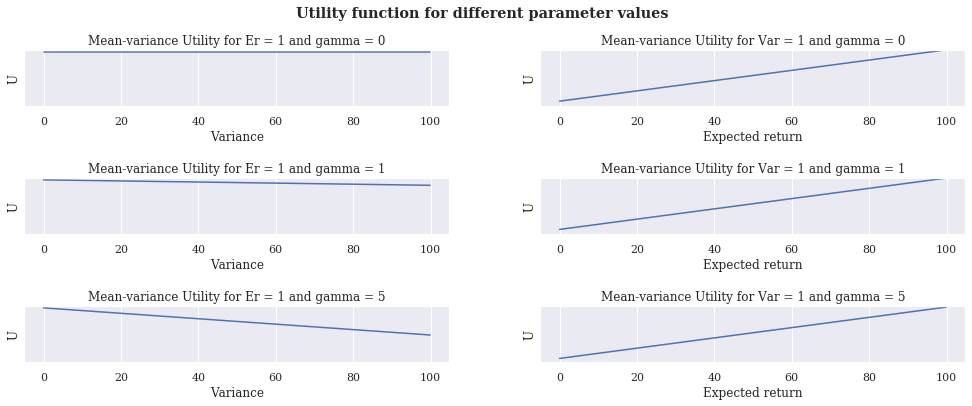

In [87]:
gamma_values = [0, 1, 5]; x = np.arange(0, 100, 0.1)
er = 1; var = 1

fig, axs = plt.subplots(len(gamma_values), 2,  figsize=(15, 6))
fig.suptitle('Utility function for different parameter values', fontweight="bold")
fig.tight_layout(pad = 4)
for i, gamma in enumerate(gamma_values):
    y = er-(1/2)*gamma*x
    axs[i, 0].plot(x, y)
    axs[i, 0].set_title('Mean-variance Utility for Er = {0} and gamma = {1}'.format(str(er), str(gamma))); axs[i, 0].set_xlabel('Variance'); axs[i, 0].set_ylabel('U')
    axs[i, 0].set_ylim([-500, 20]); axs[i, 0].set_yticks([])
    y = x-(1/2)*gamma*var
    axs[i, 1].plot(x, y)
    axs[i, 1].set_title('Mean-variance Utility for Var = {0} and gamma = {1}'.format(str(var), str(gamma))); axs[i, 1].set_xlabel('Expected return'); axs[i, 1].set_ylabel('U')
    axs[i, 1].set_ylim([-10, 100]); axs[i, 1].set_yticks([])

**The result is obvious**: both the return and volatility are assumed to have a linear relationshp with the utility. As gamma increases, more the volatility negatively affects the utility, while the return behavior remains the same.

#### 2. Indifference curves

Now, the objetive is to plot the utility curves in the mean-variance space. These are called *indifference curves* as all values in the same curve will have the same utility.

Indifference curves are important in the portfolio choice problem, as one want to choose the weights that compose a portolfio such that the expected utility is maximized.

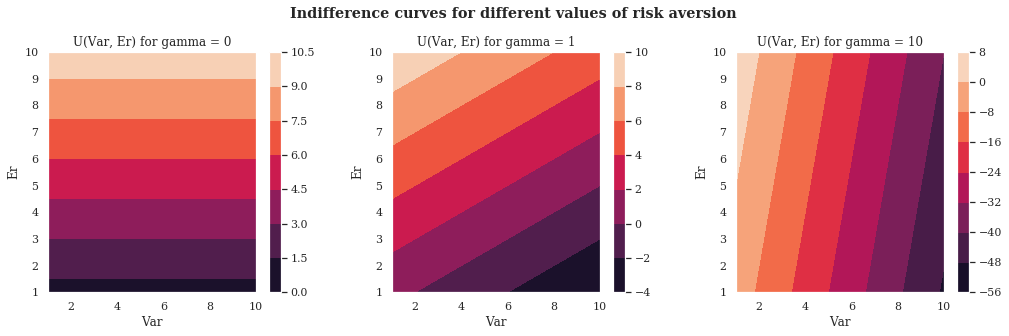

In [89]:
gamma_values = [0, 1, 10]
var = np.linspace(1, 10, 100)
er = var.reshape((var.shape[0], 1))
def U(var, er, gamma):
    return er - (1/2)*gamma*var

fig, axs = plt.subplots(1, len(gamma_values), figsize=(15, 5))
fig.tight_layout(pad = 4)
fig.suptitle('Indifference curves for different values of risk aversion', fontweight="bold")
for i, (ax, gamma) in enumerate(zip(axs.ravel(), gamma_values)):
    contours = ax.contourf(var, er.flatten(), U(var, er, gamma = gamma))
    ax.set_xlabel("Var"); ax.set_ylabel("Er")
    ax.set_title("U(Var, Er) for gamma = {0}".format(gamma))
    fig.colorbar(contours, ax=ax)

As we can see, utility is increased as we move up and to the left in the mean-volatility space. As gamma is increased, more steep become the curves. This means that an individual with high risk aversion will want to receive a high premium to accept any increase in volatility.